<a href="https://colab.research.google.com/github/SHAFNASHERIN/STROKE_PREDICTION/blob/main/STROKE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

**LOADING THE DATASET**

In [ ]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**DROPPING UNWANTED COLUMN 'id'**

In [ ]:
df=df.drop('id',axis=1)

**CHECKING SHAPE OF THE DATASET**

In [ ]:
df.shape

(5110, 11)

**CHECKING UNIQUE VALUES IN TARGET VARIABLE**

In [ ]:
df['stroke'].unique()

array([1, 0])

**PLOTTING TARGET VARIABLE**

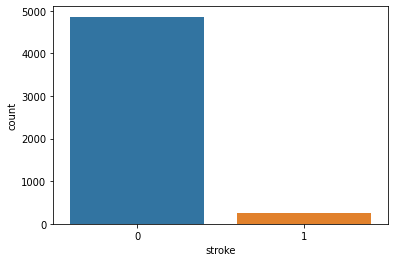

In [ ]:
sns.countplot(x="stroke",data=df)

**CHECKING WHETHER NULL VALUE PRESENT OR NOT**

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**FILLING NULL VALUE OF BMI WITH MEAN**

In [ ]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [ ]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


**CHECKING DATATYPES**

In [ ]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

**CHECKING UNIQUE VALUES**

In [ ]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

**REPLACING YES WITH 1 AND NO WITH 0**

In [ ]:
df['ever_married']=df['ever_married'].replace('Yes',1)
df['ever_married']=df['ever_married'].replace('No',0)

**REPLACING URBAN WITH 1 AND RURAL WITH 0**

In [ ]:
df['Residence_type']=df['Residence_type'].replace('Urban',1)
df['Residence_type']=df['Residence_type'].replace('Rural',0)

**ONE HOT ENCODING**

In [ ]:
df1=pd.get_dummies(df[['gender','work_type','smoking_status']])
df1

,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,0,1,0,0,0,0,1,0
5106,1,0,0,0,0,0,1,0,0,0,1,0
5107,1,0,0,0,0,0,1,0,0,0,1,0
5108,0,1,0,0,0,1,0,0,0,1,0,0


**CONCATING TWO DATASETS**

In [ ]:
df2=pd.concat([df,df1],axis=1)
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,...,0,0,0,1,0,0,0,1,0,0
1,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,...,0,0,0,0,1,0,0,0,1,0
2,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,...,0,0,0,1,0,0,0,0,1,0
3,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,...,0,0,0,1,0,0,0,0,0,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,...,0,0,0,1,0,0,0,0,1,0
5106,Female,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,...,0,0,0,0,1,0,0,0,1,0
5107,Female,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,...,0,0,0,0,1,0,0,0,1,0
5108,Male,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,...,0,0,0,1,0,0,0,1,0,0


**DROPPING UNWANTED COLUMNS AFTER CONCATINATION**

In [ ]:
df2=df2.drop(['work_type','gender','smoking_status'],axis=1)
df2

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,28.893237,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,0,105.92,32.500000,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.000000,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,28.893237,0,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,1,125.20,40.000000,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,0,82.99,30.600000,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,0,166.29,25.600000,0,0,1,0,0,0,1,0,0,0,1,0,0


**CHECKING DATATYPES OF THE PREPROCESSED DATASET**

In [ ]:
df2.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
smoking_status_Unknown              uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

**TAKING VALUE COUNTS OF STROKE COLUMN**

In [ ]:
df2['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

**SETTING X AND Y**

In [ ]:
x=df2.drop(['stroke'],axis=1)
y=df2['stroke']

**TREATING IMBALANCED DATA SET WITHOUT ANY LOSS OF DATA USING SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
x_res,y_res=SMOTE().fit_resample(x,y)
y_res.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

**TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.3,random_state=1)

**SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred1=knn.predict(x_test)

In [ ]:
y_pred1

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
print("Accuracy score :",accuracy_score(y_test,y_pred1))
print("Precision score :",precision_score(y_test,y_pred1))
print("Recall score :",recall_score(y_test,y_pred1))
print("F1 score :",f1_score(y_test,y_pred1))

Accuracy score : 0.9533767569420638
Precision score : 0.9560439560439561
Recall score : 0.9508196721311475
F1 score : 0.9534246575342467


**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred2=gnb.predict(x_test)

In [ ]:
print("Accuracy score :",accuracy_score(y_test,y_pred2))
print("Precision score :",precision_score(y_test,y_pred2))
print("Recall score :",recall_score(y_test,y_pred2))
print("F1 score :",f1_score(y_test,y_pred2))

Accuracy score : 0.6181007884813164
Precision score : 0.5681995323460639
Recall score : 0.9959016393442623
F1 score : 0.7235732009925557


**SVM**

In [ ]:
from sklearn import svm
svm=svm.SVC()
svm.fit(x_train,y_train)
y_pred3=svm.predict(x_test)

In [ ]:
print("Accuracy score :",accuracy_score(y_test,y_pred3))
print("Precision score :",precision_score(y_test,y_pred3))
print("Recall score :",recall_score(y_test,y_pred3))
print("F1 score :",f1_score(y_test,y_pred3))

Accuracy score : 0.947891669523483
Precision score : 0.9880952380952381
Recall score : 0.907103825136612
F1 score : 0.9458689458689459


**LOGIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred4=log.predict(x_test)

In [ ]:
print("Accuracy score :",accuracy_score(y_test,y_pred4))
print("Precision score :",precision_score(y_test,y_pred4))
print("Recall score :",recall_score(y_test,y_pred4))
print("F1 score :",f1_score(y_test,y_pred4))

Accuracy score : 0.9448063078505313
Precision score : 0.9779897285399853
Recall score : 0.9105191256830601
F1 score : 0.9430491687301027


**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred5=dtc.predict(x_test)

In [ ]:
print("Accuracy score :",accuracy_score(y_test,y_pred5))
print("Precision score :",precision_score(y_test,y_pred5))
print("Recall score :",recall_score(y_test,y_pred5))
print("F1 score :",f1_score(y_test,y_pred5))

Accuracy score : 0.9372643126499829
Precision score : 0.9261477045908184
Recall score : 0.9508196721311475
F1 score : 0.9383215369059656


**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred6=rfc.predict(x_test)

In [ ]:
print("Accuracy score :",accuracy_score(y_test,y_pred6))
print("Precision score :",precision_score(y_test,y_pred6))
print("Recall score :",recall_score(y_test,y_pred6))
print("F1 score :",f1_score(y_test,y_pred6))

Accuracy score : 0.9677751114158382
Precision score : 0.9776847977684798
Recall score : 0.9576502732240437
F1 score : 0.9675638371290545


**DISPLAYING CONFUSION MATRIX OF MOST ACCURATE ONE, MOST ACCURATE ONE IS RANDOM FOREST**

0.9677751114158382


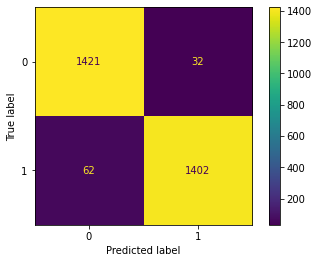

In [ ]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
acc_rfc=accuracy_score(y_test,y_pred6)
print(acc_rfc)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred6)